In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [24]:
from sklearn.tree import export_graphviz

In [2]:
class Config():
    pass
config  = pd.read_pickle('config.pkl')

In [6]:
#data_path = '../../kaggleData/JD_logging/'
#feature_path = '../../kaggleData/JD_logging/features/'
#config.data_path = data_path
#config.feature_path = feature_path
data_path = config.data_path
feature_path = config.feature_path

In [10]:
print dir(config)

['__doc__', '__module__', 'data_path', 'feature_dict', 'feature_path', 'trade_train_size']


In [7]:
trade_basic = pd.read_pickle(data_path+'trade_basic_and_recent_login.pkl')

In [8]:
trade_basic.columns

Index([u'month', u'day', u'weekday', u'hour', u'day_cycle', u'weekday_cycle',
       u'hour_cycle', u'timelong_login_0', u'timelong_login_1',
       u'timelong_login_2', u'log_from_login_0', u'log_from_login_1',
       u'log_from_login_2', u'city_login_0', u'city_login_1', u'city_login_2',
       u'result_login_0', u'result_login_1', u'result_login_2',
       u'type_login_0', u'type_login_1', u'type_login_2', u'is_scan_login_0',
       u'is_scan_login_1', u'is_scan_login_2', u'month_login_0',
       u'month_login_1', u'month_login_2', u'day_login_0', u'day_login_1',
       u'day_login_2', u'weekday_login_0', u'weekday_login_1',
       u'weekday_login_2', u'hour_login_0', u'hour_login_1', u'hour_login_2',
       u'day_cycle_login_0', u'day_cycle_login_1', u'day_cycle_login_2',
       u'weekday_cycle_login_0', u'weekday_cycle_login_1',
       u'weekday_cycle_login_2', u'hour_cycle_login_0', u'hour_cycle_login_1',
       u'hour_cycle_login_2', u'device_comparing_login_1',
       u'device_

### Visualize the distribution for the comparing results

In [28]:
config.feature_dict['trade_and_recent_login_comparing']

['device_comparing_login_1',
 'device_comparing_login_2',
 'ip_comparing_login_1',
 'ip_comparing_login_2',
 'city_comparing_login_1',
 'city_comparing_login_2',
 'log_from_comparing_login_1',
 'log_from_comparing_login_2',
 'result_comparing_login_1',
 'result_comparing_login_2',
 'type_comparing_login_1',
 'type_comparing_login_2',
 'login_distance_0',
 'login_distance_1',
 'login_distance_2']

#### Boolean型分布情况

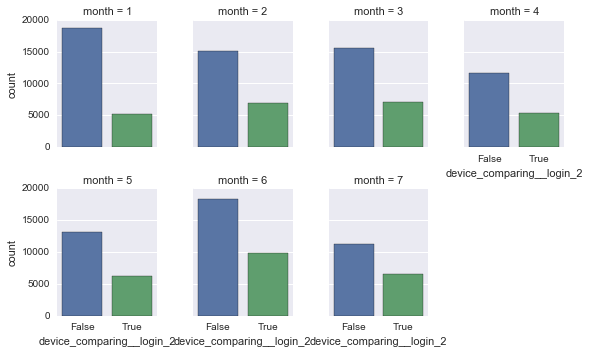

In [19]:
g = sns.factorplot("device_comparing__login_2", col="month", col_wrap=4,
              data=trade_basic,
                    kind="count", size=2.5, aspect=.8)

明显一月份的False值的数据量会多很多：在其余month中true:false的数量基本上接近于1:2，而在1月份true:false接近1:3~1:4

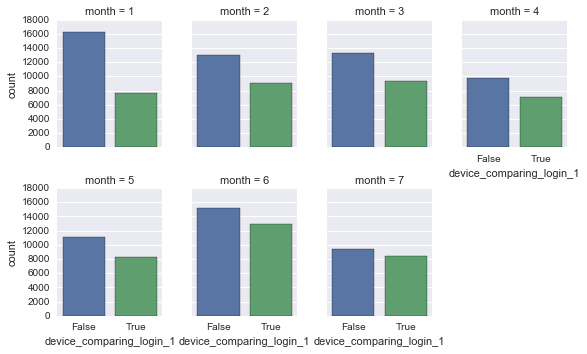

In [32]:
g = sns.factorplot("device_comparing_login_1", col="month", col_wrap=4,
              data=trade_basic,
                    kind="count", size=2.5, aspect=.8)

明显一月份的False值的数据量会多很多，同时随时间增加True的比例逐渐增加。

另一个方案是采用随机填充

#### Timedelta（后续使用Log转型） 分布情况

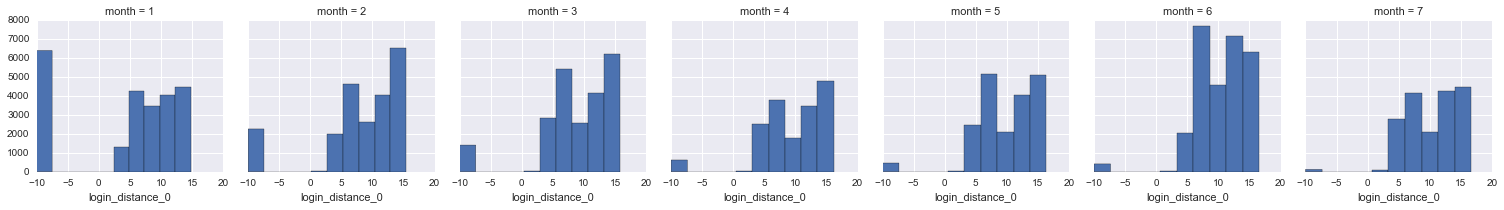

In [20]:
%matplotlib inline
g = sns.FacetGrid(trade_basic, col="month", margin_titles=True)
g.map(plt.hist, "login_distance_0")

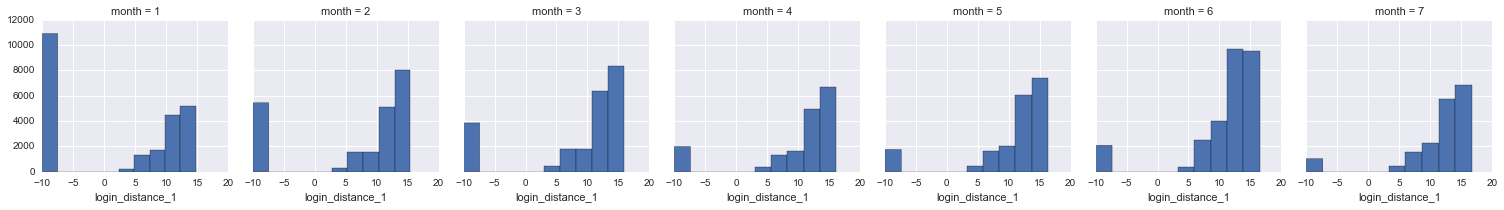

In [33]:
%matplotlib inline
g = sns.FacetGrid(trade_basic, col="month", margin_titles=True)
g.map(plt.hist, "login_distance_1")

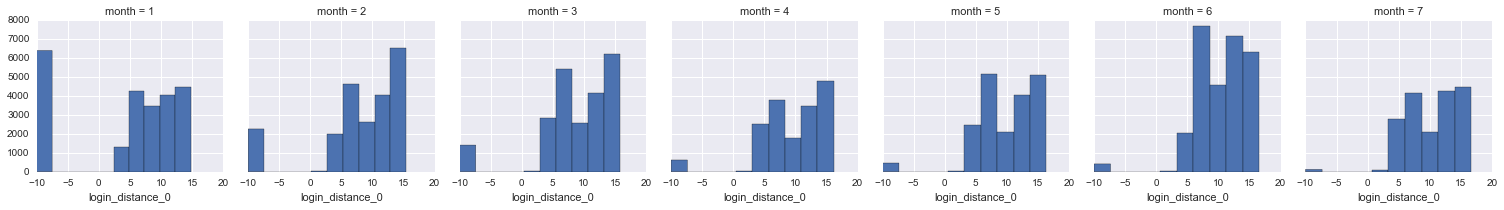

In [34]:
%matplotlib inline
g = sns.FacetGrid(trade_basic, col="month", margin_titles=True)
g.map(plt.hist, "login_distance_0")

明显一月份，甚至二月份，均有较多的缺失值。

由于缺失值和较长时间的部分为互补关系，可以考虑使用中位数或上四分位数进行填充

### Checking with tree model

In [13]:
#using all the data set
trade_train_size = config.trade_train_size
trade_label = pd.read_pickle(data_path+'trade_train_label.pkl')
trade_train = trade_basic[:trade_train_size]
trade_train['is_risk'] = trade_label

C:\Users\dell\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
clf = DecisionTreeClassifier()

In [23]:
clf.fit(trade_train.drop('is_risk',axis = 1).as_matrix(),trade_train['is_risk'].as_matrix())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [28]:
export_graphviz(clf,'basic_1_6_tree.dot',feature_names = list(trade_train.drop('is_risk',axis = 1).columns),
                max_depth=4)

In [29]:
temp_trade_1 = trade_train[trade_train['month']>2]
clf = DecisionTreeClassifier()
clf.fit(temp_trade_1.drop('is_risk',axis = 1).as_matrix(),temp_trade_1['is_risk'].as_matrix())
export_graphviz(clf,'basic_3_6_tree.dot',feature_names = list(trade_train.drop('is_risk',axis = 1).columns),
                max_depth=4)

In [30]:
temp_trade_2 = trade_train[trade_train['month']<6]
clf = DecisionTreeClassifier()
clf.fit(temp_trade_1.drop('is_risk',axis = 1).as_matrix(),temp_trade_1['is_risk'].as_matrix())
export_graphviz(clf,'basic_3_5_tree.dot',feature_names = list(trade_train.drop('is_risk',axis = 1).columns),
                max_depth=4)

In [31]:
trade_basic[trade_train_size:].shape

(17875, 62)